In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 
import matplotlib.image as mpimg

In [3]:
def interpolate_netcdf_1_4_deg(input_file, new_lat, new_lon, output_file=None):
    """
    Interpolate a NetCDF file from 1-degree to 0.25-degree resolution using bilinear interpolation.
    
    Parameters:
    -----------
    input_file : str
        Path to input NetCDF file
    new_lat : numpy.ndarray
        New latitude values at 0.25-degree resolution 
    new_lon : numpy.ndarray
        New longitude values at 0.25-degree resolution
    output_file : str, optional
        Path to save the interpolated NetCDF file. If None, returns the dataset without saving.
        
    Returns:
    --------
    xarray.Dataset
        Interpolated dataset at 0.25-degree resolution
    """
    # Read the input NetCDF file
    ds_raw = xr.open_dataset(input_file)
    ds = ds_raw.sst

    
    # Perform bilinear interpolation
    ds_interpolated = ds.interp(
        lat=new_lat,
        lon=new_lon,
        method='linear'  # This performs bilinear interpolation for 2D data
    )
    
    # Save to file if output_file is specified
    if output_file:
        ds_interpolated.to_netcdf(output_file)
        print(f"Interpolated data saved to: {output_file}")
    
    return ds_interpolated

In [4]:
nc_file_path = r"C:\Users\lv299\OneDrive\STF_Paper\Subtropical-Front-Modeling-Code\Step1\Argo_Merge_Cut_1_4Deg\Argo_Cut\Argo_Merge_Cut_04_23_1_Deg.nc"


In [5]:
oisst = xr.open_dataset(r"C:\Users\lv299\OneDrive\STF_Paper\Subtropical-Front-Modeling-Code\Step1\OISST_Merge_Cut_1_4Deg_Daily\OISST_1_4Deg_daily.nc")

In [6]:
new_lat = oisst.lat
new_lon = oisst.lon

In [7]:
argo_1_4_deg = interpolate_netcdf_1_4_deg(nc_file_path, new_lat, new_lon)

c:\Users\lv299\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\lv299\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
c:\Users\lv299\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\lv299\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. 

In [8]:
time_array = pd.date_range(start='2004-01-01', end='2023-12-15', freq='MS') + pd.Timedelta(days=14)
argo_1_4_deg['time'] = time_array

In [9]:
argo_1_4_deg

<xarray.DataArray 'sst' (time: 240, lat: 82, lon: 1440)>
array([[[        nan,         nan,  3.21467187, ...,  3.08656254,
                 nan,         nan],
        [        nan,         nan,  3.43020309, ...,  3.32018753,
                 nan,         nan],
        [        nan,         nan,  3.64573432, ...,  3.55381251,
                 nan,         nan],
        ...,
        [        nan,         nan, 16.65971851, ..., 16.78359437,
                 nan,         nan],
        [        nan,         nan, 16.67140631, ..., 16.80828177,
                 nan,         nan],
        [        nan,         nan, 16.6830941 , ..., 16.83296918,
                 nan,         nan]],

       [[        nan,         nan,  3.50218748, ...,  3.3768438 ,
                 nan,         nan],
        [        nan,         nan,  3.71506246, ...,  3.58240628,
                 nan,         nan],
        [        nan,         nan,  3.92793744, ...,  3.78796877,
                 nan,         nan],
...
        [        nan,         nan, 16.59326538, ..., 16.24150061,
                 nan,         nan],
        [        nan,         nan, 16.73479692, ..., 16.50725053,
                 nan,         nan],
        [        nan,         nan, 16.87632846, ..., 16.77300044,
                 nan,         nan]],

       [[        nan,         nan,  3.39821874, ...,  3.22770316,
                 nan,         nan],
        [        nan,         nan,  3.62478122, ...,  3.4461719 ,
                 nan,         nan],
        [        nan,         nan,  3.8513437 , ...,  3.66464064,
                 nan,         nan],
        ...,
        [        nan,         nan, 16.64949978, ..., 16.11995374,
                 nan,         nan],
        [        nan,         nan, 16.73875007, ..., 16.29710991,
                 nan,         nan],
        [        nan,         nan, 16.82800035, ..., 16.47426607,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2004-01-15 2004-02-15 ... 2023-12-15
  * lat      (lat) float64 -50.12 -49.88 -49.62 -49.38 ... -30.38 -30.12 -29.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

c:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
c:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__

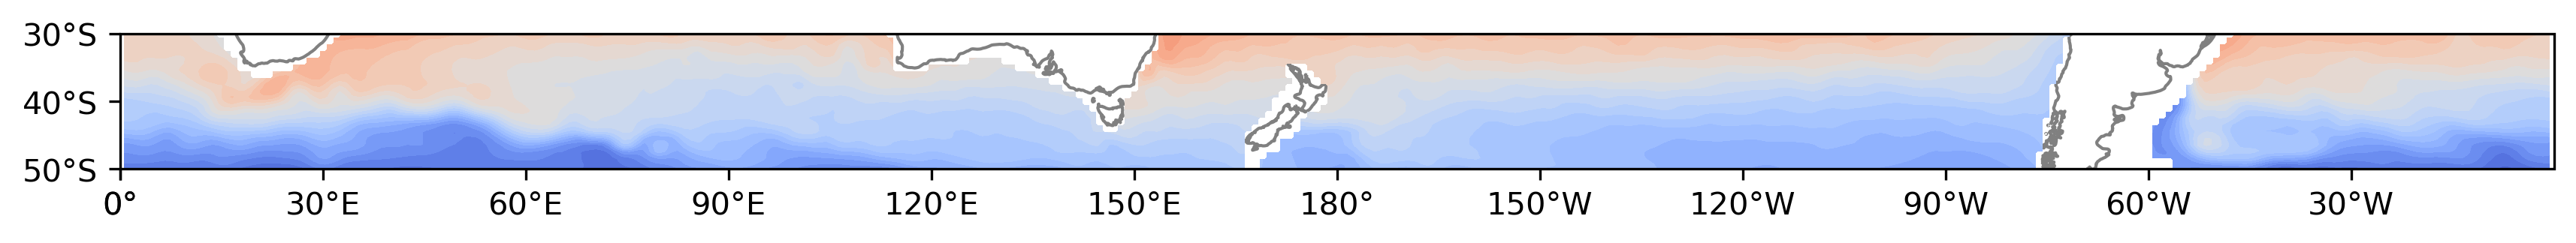

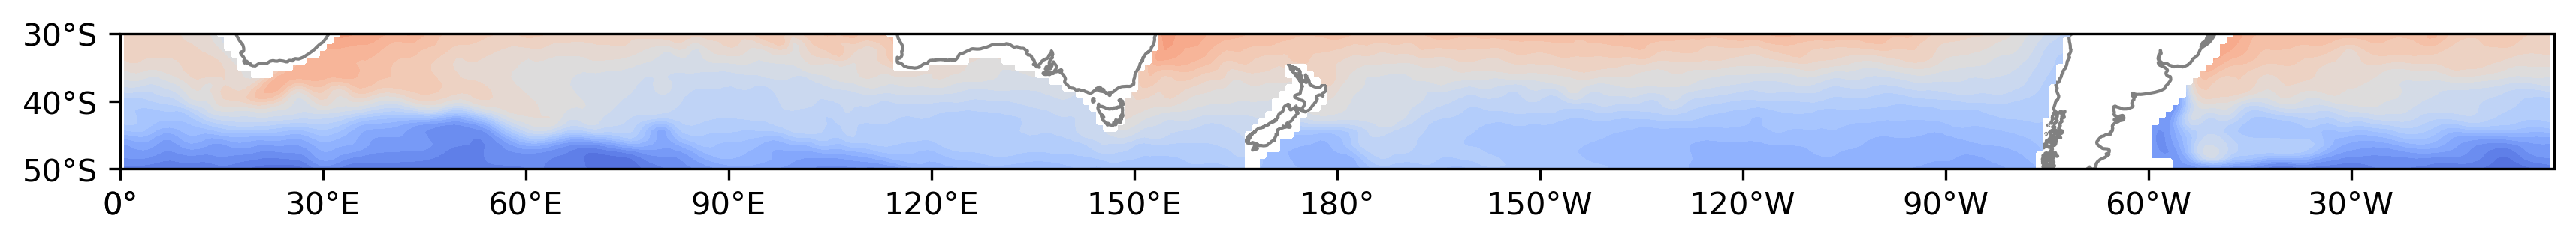

In [15]:
# test plot
leftlon, rightlon, lowerlat, upperlat = (0,361,-50,-30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

for i in range(2):

    fig = plt.figure(figsize=(12,4), dpi = 300)

    ax = fig.add_axes([0.05, 0.2, 0.9, 0.9],projection = ccrs.PlateCarree(central_longitude=180),zorder = 1)
    ax.set_extent(img_extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE,color='grey') 
    ax.set_xticks(range(0,361,30), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-50,-29,10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)


    c = ax.contourf(argo_1_4_deg.lon,argo_1_4_deg.lat,argo_1_4_deg[i,:,:],
                    levels = np.arange(0,30,1),
                    cmap = 'coolwarm',
                    extend='both' ,
                    transform=ccrs.PlateCarree(),
                    zorder = 2)



In [16]:
argo_1_4_deg.to_netcdf('argo_1_4_deg.nc')